In [23]:
!pip install tensorflow

In [57]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [58]:
data = pd.read_csv('C:\\Users\\Home\\Downloads\\Dataset--Heart-Disease-Prediction-using-ANN.csv')

In [35]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [37]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [39]:
x=data.iloc[:,:13].values
y=data["target"].values
print(x)
print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [40]:
X_train,X_test,y_train, y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0 )
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

C:\Users\Home\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

classifier = Sequential()

# Add Input layer first
classifier.add(Input(shape=(13,)))  

classifier.add(Dense(units=8, activation="relu", kernel_initializer="uniform"))
classifier.add(Dense(units=14, activation="relu", kernel_initializer="uniform"))
classifier.add(Dense(units=1, activation="sigmoid", kernel_initializer="uniform"))

classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])


In [42]:
classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 100  )

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5566 - loss: 0.6923
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6038 - loss: 0.6876 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8066 - loss: 0.6705  
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8349 - loss: 0.6289 
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8396 - loss: 0.5612  
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8443 - loss: 0.4855 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8491 - loss: 0.4263   
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8585 - loss: 0.3860
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8491 - loss: 0.3622 
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8632 - loss: 0.3457  
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8679 - loss: 0.3359 
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s

In [43]:
def build_model():
    model = Sequential([
        Input(shape=(13,)),   # 13 input features
        Dense(units=8, activation="relu", kernel_initializer="he_uniform"),
        Dense(units=14, activation="relu", kernel_initializer="he_uniform"),
        Dense(units=1, activation="sigmoid", kernel_initializer="glorot_uniform")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [44]:
model_no_scaling = build_model()
history_no_scaling = model_no_scaling.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=0
)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
model_scaled = build_model()
history_scaled = model_scaled.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=0
)

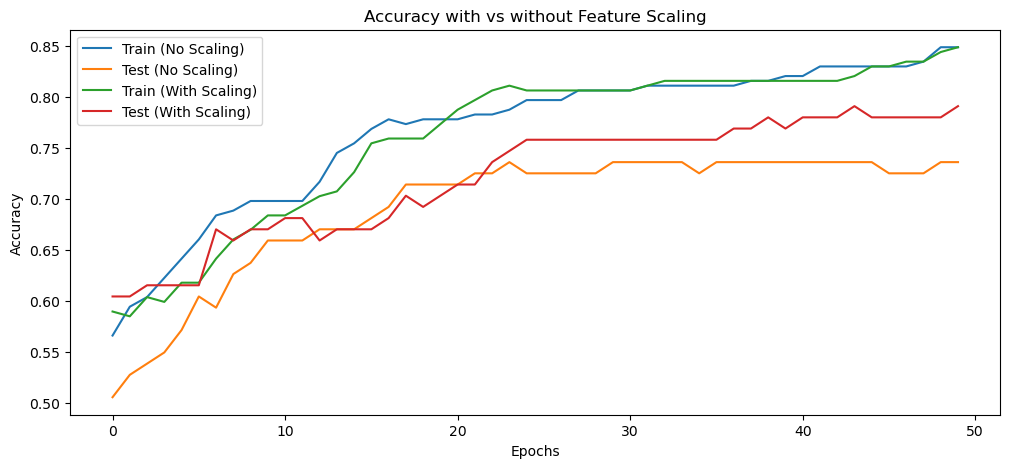

In [47]:
plt.figure(figsize=(12,5))
plt.plot(history_no_scaling.history["accuracy"], label="Train (No Scaling)")
plt.plot(history_no_scaling.history["val_accuracy"], label="Test (No Scaling)")
plt.plot(history_scaled.history["accuracy"], label="Train (With Scaling)")
plt.plot(history_scaled.history["val_accuracy"], label="Test (With Scaling)")
plt.title("Accuracy with vs without Feature Scaling")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


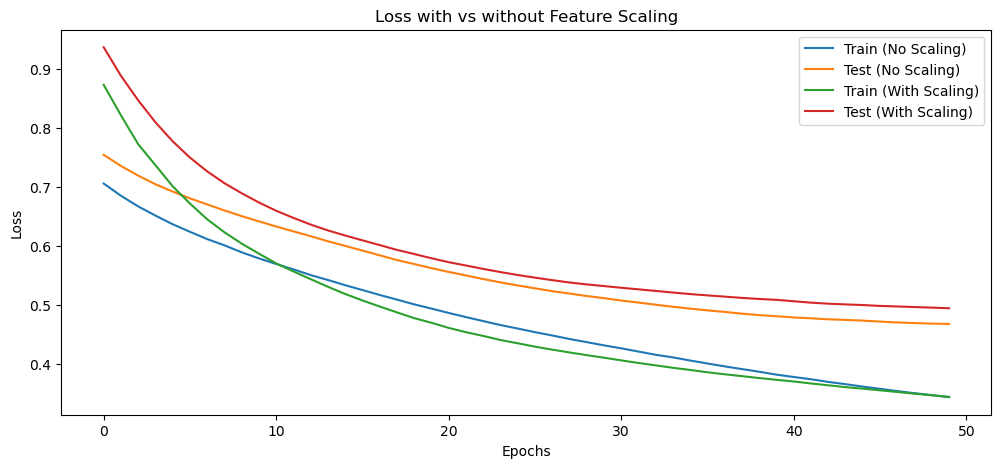

In [48]:
plt.figure(figsize=(12,5))
plt.plot(history_no_scaling.history["loss"], label="Train (No Scaling)")
plt.plot(history_no_scaling.history["val_loss"], label="Test (No Scaling)")
plt.plot(history_scaled.history["loss"], label="Train (With Scaling)")
plt.plot(history_scaled.history["val_loss"], label="Test (With Scaling)")
plt.title("Loss with vs without Feature Scaling")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Build model
model = Sequential([
    Input(shape=(13,)),   # 13 input features
    Dense(units=8, activation="relu", kernel_initializer="he_uniform"),
    Dense(units=14, activation="relu", kernel_initializer="he_uniform"),
    Dense(units=1, activation="sigmoid", kernel_initializer="glorot_uniform")
])

# Compile model
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [50]:
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=100,
                    batch_size=32,
                    verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.4434 - loss: 1.6637 - val_accuracy: 0.4725 - val_loss: 1.3809
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4292 - loss: 1.5611 - val_accuracy: 0.4615 - val_loss: 1.3059
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4198 - loss: 1.4700 - val_accuracy: 0.4615 - val_loss: 1.2369
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4151 - loss: 1.3872 - val_accuracy: 0.4615 - val_loss: 1.1742
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4009 - loss: 1.3085 - val_accuracy: 0.4505 - val_loss: 1.1179
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3868 - loss: 1.2380 - val_accuracy: 0.4505 - val_loss: 1.0676
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3915 - loss: 1.1802 - val_accuracy: 0.4505 - val_loss: 1.0207
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3915 - loss: 1.1230 - val_accuracy: 0.4725 - val_loss:

In [51]:
loss, acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {acc:.2f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7582 - loss: 0.5050
Test Accuracy: 0.76


In [53]:
!pip install keras-tuner --upgrade



   ---------------------------------------- 0/2 [kt-legacy]
   ---------------------------------------- 0/2 [kt-legacy]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   ---------------------------------------- 2/2 [keras-tuner]



In [55]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(13,)))
    
    # Tune number of neurons in first layer
    model.add(Dense(units=hp.Int("units1", min_value=8, max_value=64, step=8),
                    activation="relu"))
    
    # Tune dropout rate
    model.add(Dropout(hp.Float("dropout", 0.0, 0.5, step=0.1)))
    
    # Output layer
    model.add(Dense(1, activation="sigmoid"))
    
    # Tune learning rate of Adam optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(
                      hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

# Define tuner
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=2,
    directory="tuner_dir",
    project_name="heart_disease"
)

tuner.search(X_train_scaled, y_train,
             epochs=50,
             validation_data=(X_test_scaled, y_test))


Trial 10 Complete [00h 00m 27s]
val_accuracy: 0.5054945200681686

Best val_accuracy So Far: 0.8571428656578064
Total elapsed time: 00h 05m 30s


In [56]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


C:\Users\Home\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
loss, acc = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.8901


In [60]:
from sklearn.metrics import classification_report

y_pred = (best_model.predict(X_test_scaled) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        44
           1       0.89      0.89      0.89        47

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91



In [61]:
new_pred = (best_model.predict(new_data_scaled) > 0.5).astype("int32")
print("Prediction:", "Heart Disease" if new_pred[0][0] == 1 else "No Heart Disease")


NameError: name 'new_data_scaled' is not defined

In [62]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = []

for train_idx, val_idx in kf.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_tr, y_val = y_train[train_idx], y_train[val_idx]

    # Rebuild a fresh copy of your best model each fold
    model = keras.models.clone_model(best_model)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    
    model.fit(X_tr, y_tr, epochs=20, batch_size=32, verbose=0)
    scores = model.evaluate(X_val, y_val, verbose=0)
    cv_scores.append(scores[1])  # accuracy

print(f"CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


CV Accuracy: 0.7879 ± 0.0488


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_deeper_model():
    model = Sequential()

    # Input layer + first hidden layer
    model.add(Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(0.3))

    # Second hidden layer
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))

    # Third hidden layer
    model.add(Dense(16, activation="relu"))

    # Output layer
    model.add(Dense(1, activation="sigmoid"))

    # Compile model
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Build and train
deeper_model = build_deeper_model()
history = deeper_model.fit(X_train_scaled, y_train, 
                           epochs=50, batch_size=32, 
                           validation_data=(X_test_scaled, y_test),
                           verbose=1)

tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=2,
    directory="tuner_dir",
    project_name="heart_disease"
)

tuner.search(X_train_scaled, y_train,
             epochs=50,
             validation_data=(X_test_scaled, y_test))


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5425 - loss: 0.6886 - val_accuracy: 0.7033 - val_loss: 0.6600
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6745 - loss: 0.6312 - val_accuracy: 0.7692 - val_loss: 0.6294
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7170 - loss: 0.6079 - val_accuracy: 0.7802 - val_loss: 0.5996
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7123 - loss: 0.5861 - val_accuracy: 0.7582 - val_loss: 0.5686
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7642 - loss: 0.5530 - val_accuracy: 0.7692 - val_loss: 0.5384
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8349 - loss: 0.5021 - val_accuracy: 0.7692 - val_loss: 0.5094
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7877 - loss: 0.4920 - val_accuracy: 0.7692 - val_loss: 0.4867
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8255 - loss: 0.4728 - val_accuracy: 0.7802 - val_loss: 0.4696
E

In [66]:
def build_wider_model():
    model = Sequential()
    model.add(Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

wider_model = build_wider_model()
wider_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, 
                validation_data=(X_test_scaled, y_test), verbose=1)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6274 - loss: 0.6727 - val_accuracy: 0.6813 - val_loss: 0.6261
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7453 - loss: 0.5573 - val_accuracy: 0.7692 - val_loss: 0.5430
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8113 - loss: 0.4659 - val_accuracy: 0.8132 - val_loss: 0.4854
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8585 - loss: 0.4049 - val_accuracy: 0.8352 - val_loss: 0.4478
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8349 - loss: 0.3915 - val_accuracy: 0.8352 - val_loss: 0.4254
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8349 - loss: 0.3630 - val_accuracy: 0.8352 - val_loss: 0.4169
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8585 - loss: 0.3582 - val_accuracy: 0.8242 - val_loss: 0.4129
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8726 - loss: 0.3364 - val_accuracy: 0.8242 - val_loss: 0.4142


In [67]:
# Evaluate deeper model
loss, acc = deeper_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Deeper Model Test Accuracy: {acc:.4f}")

# Evaluate wider model
loss, acc = wider_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Wider Model Test Accuracy: {acc:.4f}")

# You can also compare precision/recall/F1
from sklearn.metrics import classification_report

y_pred = (deeper_model.predict(X_test_scaled) > 0.5).astype("int32")
print("Deeper Model Report:\n", classification_report(y_test, y_pred))


Deeper Model Test Accuracy: 0.8352
Wider Model Test Accuracy: 0.8352
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Deeper Model Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        44
           1       0.81      0.89      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

